# Comparing likelihoods and revealing pathologies

In this notebook, we use the likelihoods from the models that have been trained to reveal pathologies.

In [1]:
%load_ext autoreload

%autoreload 2
from utils import parse_table, read_csv
import pandas as pd
import numpy as np

from pretty import plot_kde, ColorTheme


plotting_map = {
    'fashion-mnist': 'FMNIST',
    'mnist': 'MNIST',
    'emnist': 'EMNIST',
    'omniglot': 'Omniglot',
    'celeba-small': 'CelebA',
    'svhn': 'SVHN',
    'cifar10': 'CIFAR10',
    'cifar100': 'CIFAR100',
    'tiny-imagenet': 'Tiny',
}

def get_all_plots(all_tasks, task_type, xlims, figsizes, model_type, data_lists):
    
    for task_list, xlim_, figsize_, task_type_ in zip(data_lists, xlims, figsizes, task_type):
        in_distr_data = task_list[0]
        labels = [f'{plotting_map[in_distr_data]} (In-Distr.)', 'Generated']
        colors = [ColorTheme.IN_DISTR.value, ColorTheme.GENERATED.value]
        task_list = task_list[1:]
        x_values = []
        for i, data in enumerate(task_list):
            colors.append(ColorTheme.OOD.value if i == 0 else ColorTheme.OOD_SECONDARY.value)
            labels.append(f'{plotting_map[data]} (OOD)')
            df = all_tasks[task_type_][in_distr_data][data]
            
            if i == 0:
                x_values.append(df[df['name'] == 'test']['log-likelihood'].values)
                x_values.append(df[df['name'] == 'generated']['log-likelihood'].values)
            x_values.append(df[df['name'] == 'ood']['log-likelihood'].values)
            
        plot_kde(
            x_values=x_values,
            labels = labels,
            colors = colors,
            y_label='Density',
            x_label='$\\log p_\\theta(\\mathbf{x})$',
            scale=3,
            figsize=figsize_,
            legend_loc='upper center',
            xlim=xlim_,
            file_name=f'{in_distr_data}_vs_{"_".join(task_list)}_{model_type}',
            
            fontsize=24,
            legend_fontsize=18,
            tick_fontsize=20,
        )

## Diffusion models


In [2]:
df = read_csv('grayscale_LID_vs_likelihood_diffusion.csv')
all_tasks_grayscale = parse_table(df)

for A in all_tasks_grayscale.keys():
    for B in all_tasks_grayscale[A].keys():
        print(f"{A} vs {B}: {len(all_tasks_grayscale[A][B])}")

df = read_csv('rgb_LID_vs_likelihood_diffusion.csv')
all_tasks_rgb = parse_table(df)
for A in all_tasks_rgb.keys():
    for B in all_tasks_rgb[A].keys():
        print(f"{A} vs {B}: {len(all_tasks_rgb[A][B])}")

all_tasks = {
    'grayscale': all_tasks_grayscale,
    'rgb': all_tasks_rgb,
}

3/5: 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


mnist vs omniglot: 7024
mnist vs emnist: 9192
mnist vs fashion-mnist: 9192
omniglot vs mnist: 7024
omniglot vs emnist: 7024
omniglot vs fashion-mnist: 7024
fashion-mnist vs omniglot: 7024
fashion-mnist vs mnist: 9192
fashion-mnist vs emnist: 9192
emnist vs omniglot: 7024
emnist vs mnist: 9192
emnist vs fashion-mnist: 9192


5/7: 100%|██████████| 5/5 [00:14<00:00,  2.93s/it]

cifar100 vs cifar10: 21000
cifar100 vs celeba: 11476
cifar100 vs tiny-imagenet: 21000
cifar100 vs svhn: 21000
cifar100 vs celeba-small: 11476
cifar10 vs cifar100: 21000
cifar10 vs celeba: 11476
cifar10 vs tiny-imagenet: 21000
cifar10 vs svhn: 21000
cifar10 vs celeba-small: 11476
tiny-imagenet vs cifar100: 21000
tiny-imagenet vs cifar10: 31000
tiny-imagenet vs celeba: 11476
tiny-imagenet vs svhn: 21000
tiny-imagenet vs celeba-small: 11476
svhn vs cifar100: 21000
svhn vs cifar10: 31000
svhn vs celeba: 11476
svhn vs tiny-imagenet: 21000
svhn vs celeba-small: 11476
celeba-small vs cifar100: 11476
celeba-small vs cifar10: 21476
celeba-small vs celeba: 11476
celeba-small vs tiny-imagenet: 11476
celeba-small vs svhn: 11476


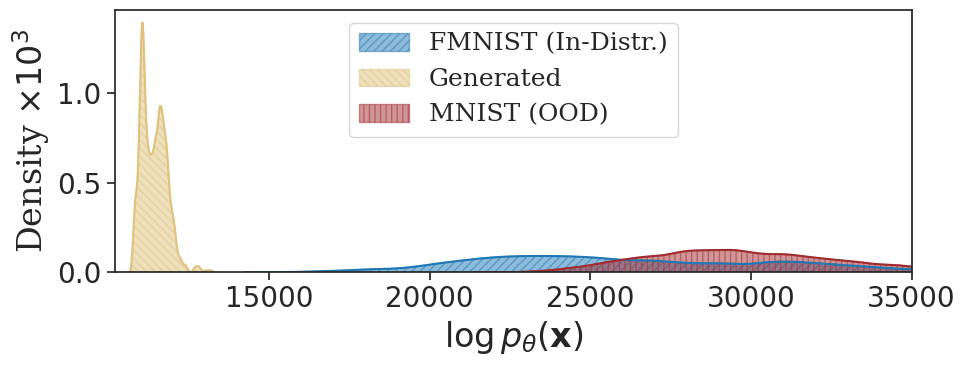

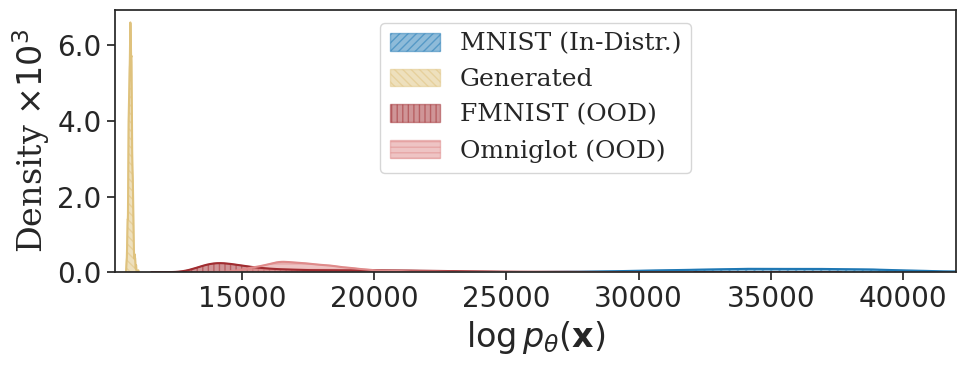

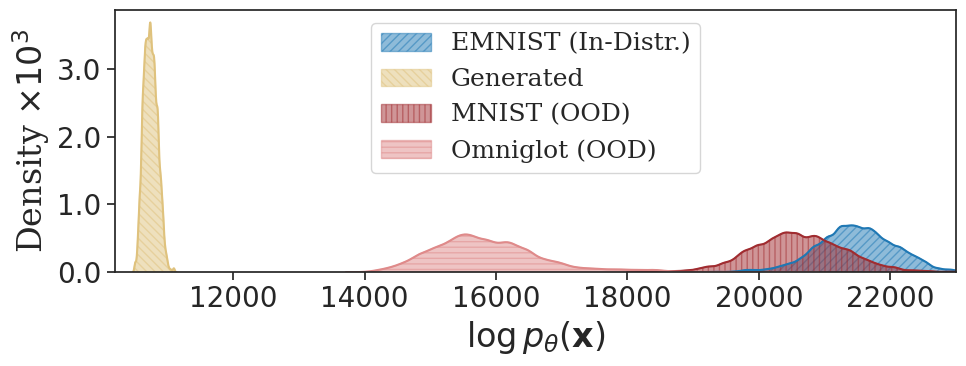

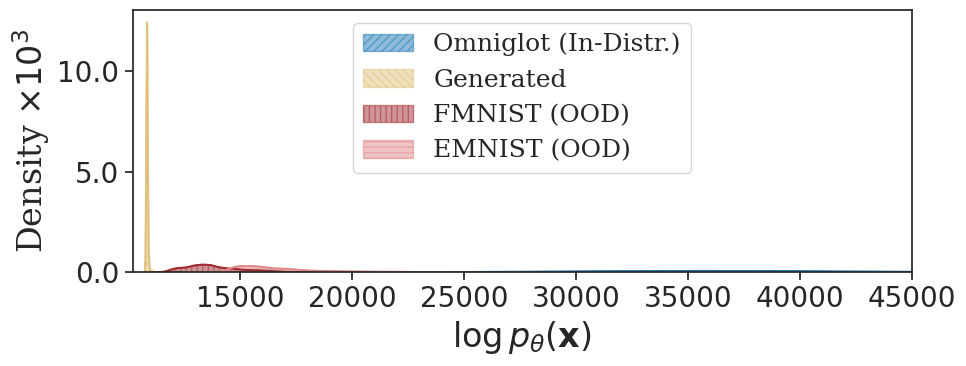

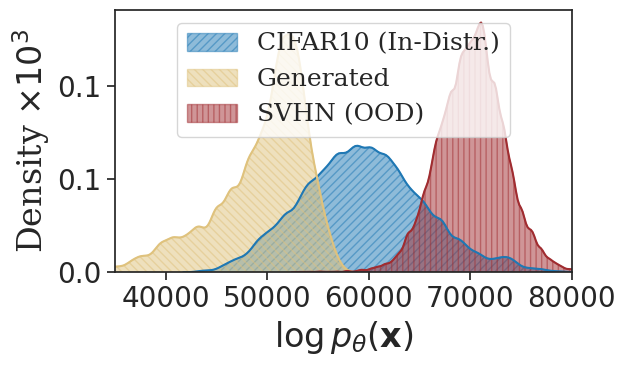

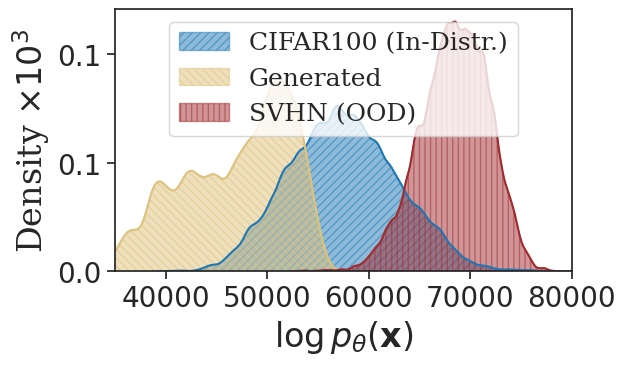

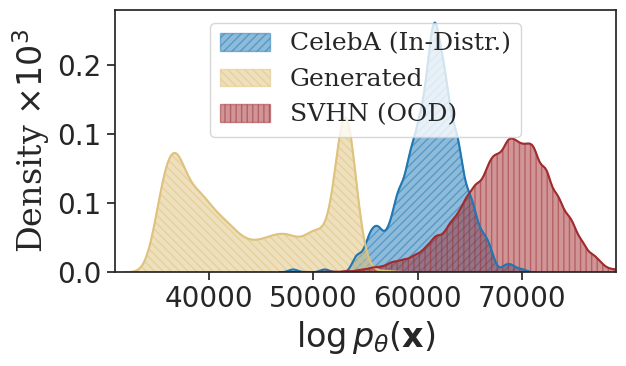

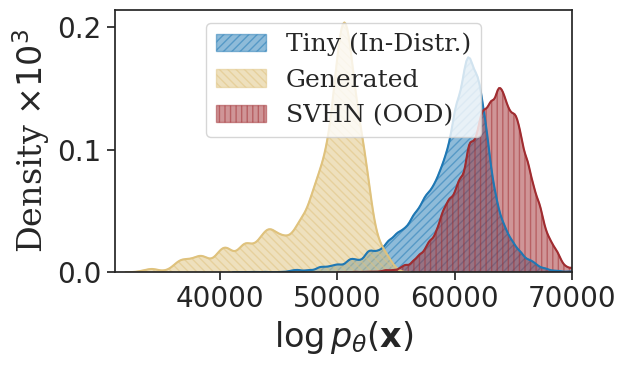

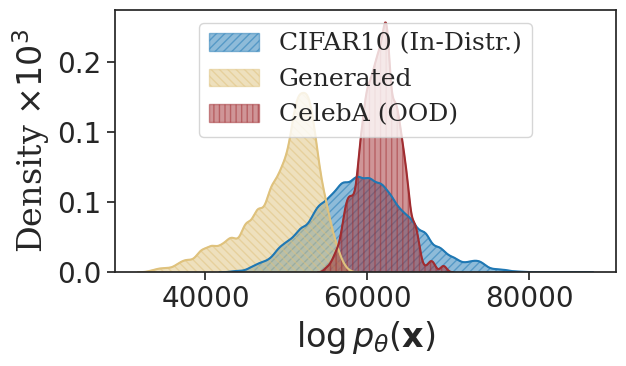

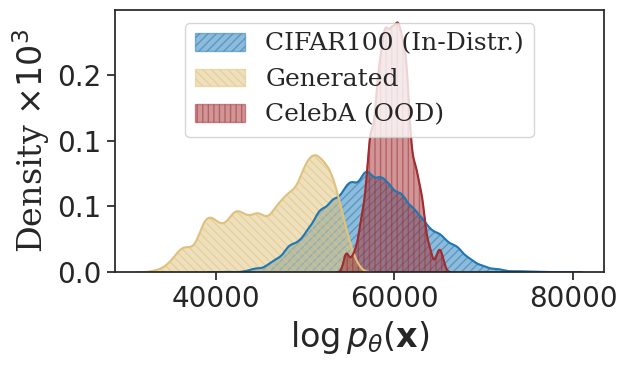

In [3]:

data_lists = [
    ['fashion-mnist', 'mnist'],
    ['mnist', 'fashion-mnist', 'omniglot'],
    ['emnist', 'mnist', 'omniglot'],
    ['omniglot', 'fashion-mnist', 'emnist'],
    ['cifar10', 'svhn'],
    ['cifar100', 'svhn'],
    ['celeba-small', 'svhn'],
    ['tiny-imagenet', 'svhn'],
    ['cifar10', 'celeba-small'],
    ['cifar100', 'celeba-small'],
]

task_type = [
    'grayscale',
    'grayscale',
    'grayscale',
    'grayscale',
    'rgb',
    'rgb',
    'rgb',
    'rgb',
    'rgb',
    'rgb',
]

xlims = [
    (10200, 35000),
    (10200, 42000),
    (10200, 23000),
    (10200, 45000),
    (35000, 80000),
    (35000, 80000),
    (31000, 79000),
    (31000, 70000),
    None,
    None,
]
figsizes = [
    (10, 4),
    (10, 4),
    (10, 4),
    (10, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
]

get_all_plots(all_tasks, task_type, xlims, figsizes, 'diffusion', data_lists)

## Flow models

In [4]:
df = read_csv('grayscale_LID_vs_likelihood_flow_fixed.csv')
all_tasks_grayscale = parse_table(df)

for A in all_tasks_grayscale.keys():
    for B in all_tasks_grayscale[A].keys():
        print(f"{A} vs {B}: {len(all_tasks_grayscale[A][B])}")

df = read_csv('rgb_LID_vs_likelihood_flow_lpca.csv')
all_tasks_rgb = parse_table(df)
for A in all_tasks_rgb.keys():
    for B in all_tasks_rgb[A].keys():
        print(f"{A} vs {B}: {len(all_tasks_rgb[A][B])}")

all_tasks = {
    'grayscale': all_tasks_grayscale,
    'rgb': all_tasks_rgb,
}

3/5: 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]


mnist vs omniglot: 12928
mnist vs emnist: 21000
mnist vs fashion-mnist: 21000
omniglot vs mnist: 12928
omniglot vs emnist: 12928
omniglot vs fashion-mnist: 12928
fashion-mnist vs omniglot: 12928
fashion-mnist vs mnist: 21000
fashion-mnist vs emnist: 21000
emnist vs omniglot: 12928
emnist vs mnist: 21000
emnist vs fashion-mnist: 21000


5/7: 100%|██████████| 5/5 [00:16<00:00,  3.29s/it]

cifar100 vs cifar10: 21000
cifar100 vs celeba: 21476
cifar100 vs tiny-imagenet: 21000
cifar100 vs svhn: 21000
cifar100 vs celeba-small: 11476
cifar10 vs cifar100: 21000
cifar10 vs celeba: 21476
cifar10 vs tiny-imagenet: 21000
cifar10 vs svhn: 21000
cifar10 vs celeba-small: 11476
tiny-imagenet vs cifar100: 21000
tiny-imagenet vs cifar10: 31000
tiny-imagenet vs celeba: 21476
tiny-imagenet vs svhn: 21000
tiny-imagenet vs celeba-small: 11476
svhn vs cifar100: 21000
svhn vs cifar10: 31000
svhn vs celeba: 21476
svhn vs tiny-imagenet: 21000
svhn vs celeba-small: 11476
celeba-small vs cifar100: 11476
celeba-small vs cifar10: 21476
celeba-small vs celeba: 11476
celeba-small vs tiny-imagenet: 11476
celeba-small vs svhn: 11476


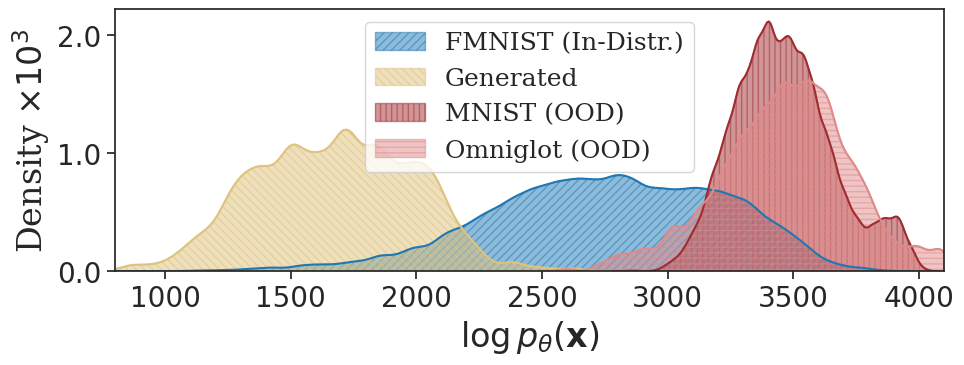

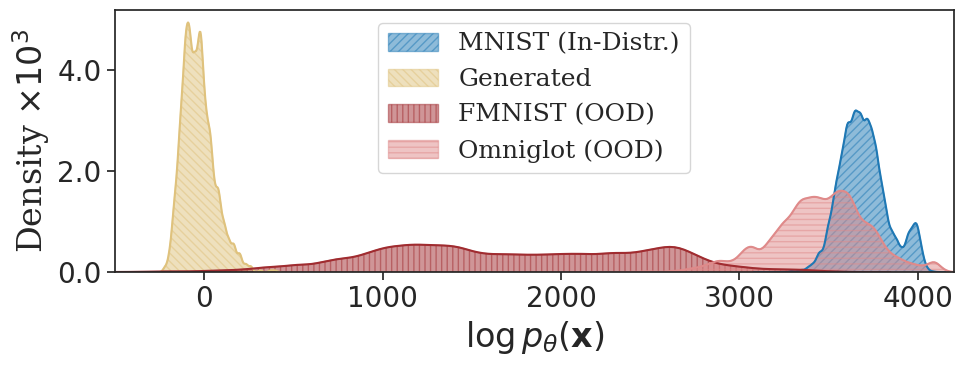

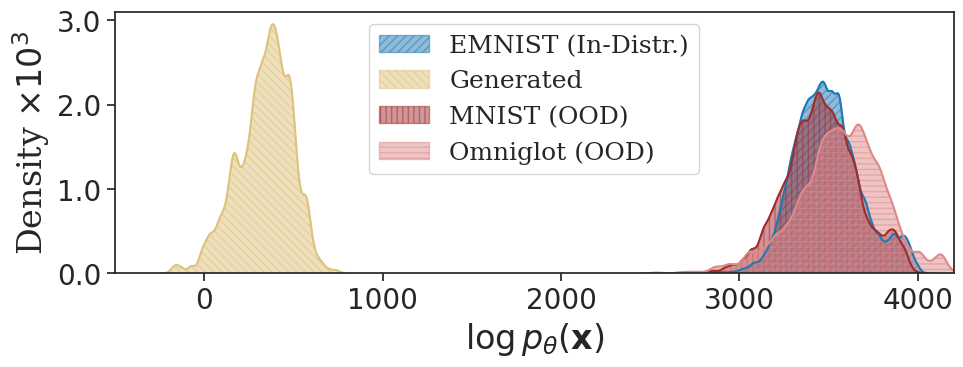

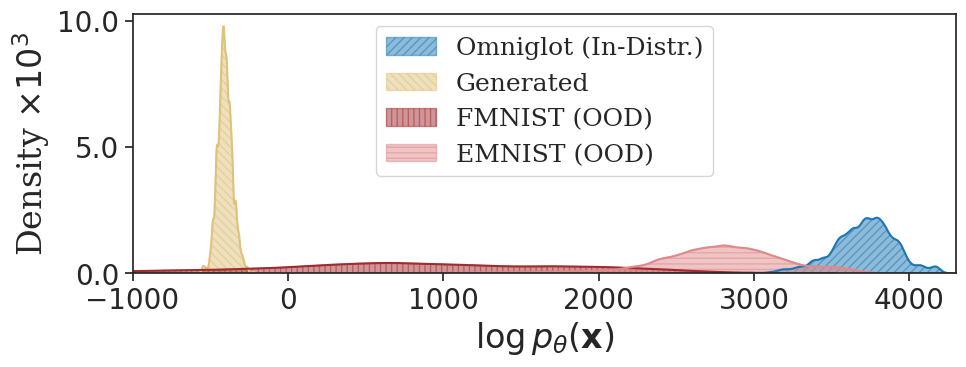

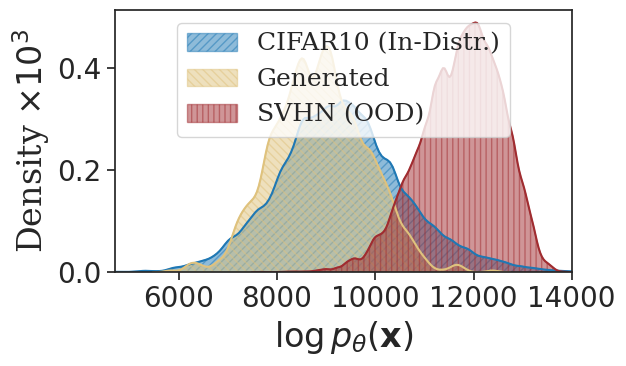

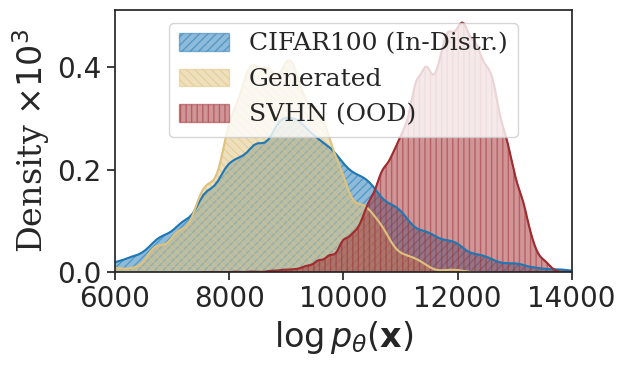

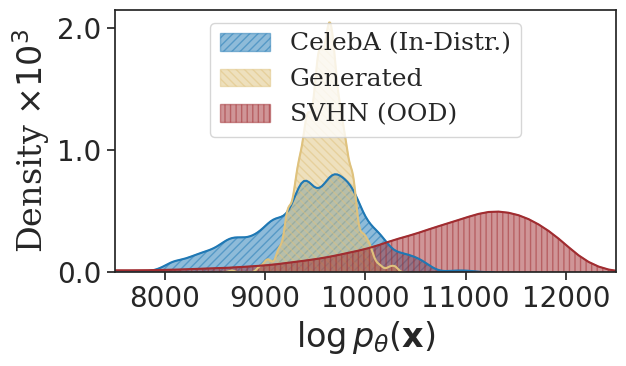

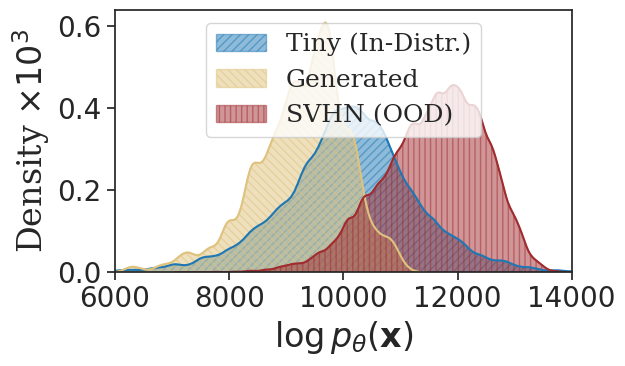

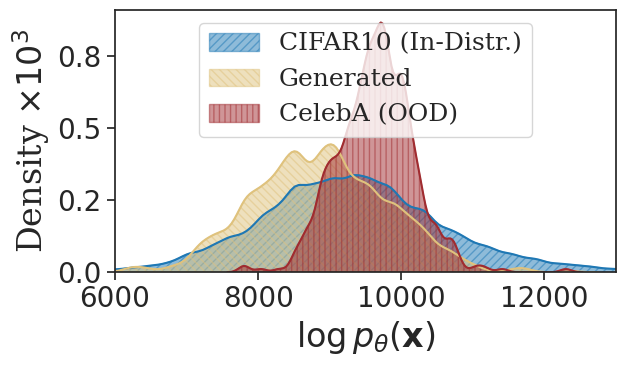

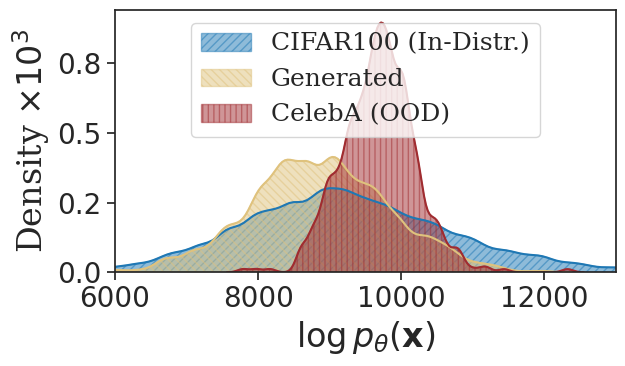

In [5]:
data_lists = [
    ['fashion-mnist', 'mnist', 'omniglot'],
    ['mnist', 'fashion-mnist', 'omniglot'],
    ['emnist', 'mnist', 'omniglot'],
    ['omniglot', 'fashion-mnist', 'emnist'],
    ['cifar10', 'svhn'],
    ['cifar100', 'svhn'],
    ['celeba-small', 'svhn'],
    ['tiny-imagenet', 'svhn'],
    ['cifar10', 'celeba-small'],
    ['cifar100', 'celeba-small'],
]

task_type = [
    'grayscale',
    'grayscale',
    'grayscale',
    'grayscale',
    'rgb',
    'rgb',
    'rgb',
    'rgb',
    'rgb',
    'rgb',
]


xlims = [
    (800, 4100),
    (-500, 4200),
    (-500, 4200),
    (-1000, 4300),
    (4700, 14000),
    (6000, 14000),
    (7500, 12500),
    (6000, 14000),
    (6000, 13000),
    (6000, 13000),
]
figsizes = [
    (10, 4),
    (10, 4),
    (10, 4),
    (10, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
    (6.6, 4),
]

get_all_plots(all_tasks, task_type, xlims, figsizes, 'flow', data_lists)